# **Random Forest Classifier Tutorial with Python**

## Source: https://www.kaggle.com/elikplim/car-evaluation-data-set/version/1

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
import warnings

warnings.filterwarnings('ignore')

# Import dataset** <a class="anchor" id="8"></a>

In [4]:
df = pd.read_csv('car_evaluation.csv', header=None)
df.shape

(1728, 7)

# Exploratory data analysis** <a class="anchor" id="9"></a>

### Rename column names

We can see that the dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. We should give proper names to the columns. I will do it as follows:-

In [11]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
# let's again preview the dataset

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### View summary of dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Frequency distribution of values in variables

Now, I will check the frequency counts of categorical variables.

In [12]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(df[col].value_counts())   


med      432
vhigh    432
low      432
high     432
Name: buying, dtype: int64
med      432
vhigh    432
low      432
high     432
Name: maint, dtype: int64
2        432
5more    432
4        432
3        432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
med      576
big      576
small    576
Name: lug_boot, dtype: int64
med     576
low     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


We can see that the `doors` and `persons` are categorical in nature. So, I will treat them as categorical variables.

### Summary of variables


- There are 7 variables in the dataset. All the variables are of categorical data type.


- These are given by `buying`, `maint`, `doors`, `persons`, `lug_boot`, `safety` and `class`.


- `class` is the target variable.

### Explore `class` variable

In [13]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

The `class` target variable is ordinal in nature.

### Missing values in variables

In [14]:
# check missing values in variables

df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

# Declare feature vector and target variable** <a class="anchor" id="10"></a>

In [15]:
X = df.drop(['class'], axis=1)

y = df['class']

# Split data into separate training and test set** <a class="anchor" id="11"></a>


In [32]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((1157, 6), (571, 6))

# Feature Engineering** <a class="anchor" id="12"></a>

In [62]:
# check data types in X_train

X_train.dtypes

buying      float64
maint       float64
persons     float64
lug_boot    float64
safety      float64
dtype: object

### Encode categorical variables

In [63]:
from sklearn.preprocessing import OrdinalEncoder

In [34]:
# encode categorical variables with ordinal encoding

encoder = OrdinalEncoder()
X_train = pd.DataFrame(encoder.fit_transform(X_train))
X_test = pd.DataFrame(encoder.transform(X_test))
X_train.columns = X.columns
X_test.columns = X.columns

In [35]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
0,3.0,3.0,1.0,2.0,1.0,1.0
1,0.0,3.0,1.0,1.0,2.0,1.0
2,3.0,0.0,1.0,2.0,2.0,0.0
3,1.0,1.0,3.0,2.0,2.0,0.0
4,2.0,1.0,0.0,2.0,2.0,0.0


In [36]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
0,0.0,0.0,2.0,0.0,1.0,0.0
1,2.0,1.0,0.0,1.0,1.0,2.0
2,0.0,0.0,3.0,0.0,0.0,2.0
3,1.0,0.0,3.0,1.0,1.0,2.0
4,2.0,1.0,2.0,2.0,1.0,1.0


# Random Forest Classifier model with default parameters** <a class="anchor" id="13"></a>

In [37]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 

rfc = RandomForestClassifier(random_state=42)

# fit the model

rfc.fit(X_train, y_train)

# Predict the Test set results

y_pred = rfc.predict(X_test)



# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9597


# Random Forest Classifier model with parameter n_estimators=200

In [40]:
# instantiate the classifier with n_estimators = 200

rfc_100 = RandomForestClassifier(n_estimators=200, random_state=42)



# fit the model to the training set

rfc_100.fit(X_train, y_train)



# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)



# Check accuracy score 

print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9667


# Find important features with Random Forest model

In [41]:
# create the classifier with n_estimators = 200

clf = RandomForestClassifier(n_estimators=200, random_state=42)

# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

Use the feature importance variable to see feature importance scores.

In [42]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.268045
persons     0.219344
buying      0.192626
maint       0.161567
lug_boot    0.088063
doors       0.070355
dtype: float64

We can see that the most important feature is `safety` and least important feature is `doors`.

#  Visualize feature scores of the features

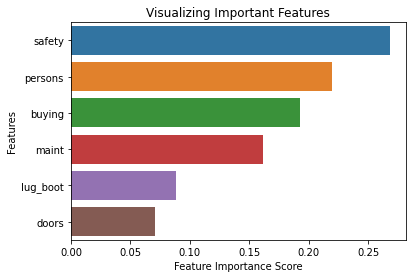

In [43]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")



# Visualize the graph

plt.show()

# Build Random Forest model on selected features
Drop the least important feature `doors` from the model, rebuild the model and check its effect on accuracy.

In [44]:
# declare feature vector and target variable

X = df.drop(['class', 'doors'], axis=1)

y = df['class']

In [45]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [51]:
# encode categorical variables with ordinal encoding

encoder = OrdinalEncoder()


X_train = pd.DataFrame(encoder.fit_transform(X_train))
X_test = pd.DataFrame(encoder.transform(X_test))
X_train.columns = X.columns
X_test.columns = X.columns

In [59]:
# instantiate the classifier with n_estimators = 100

clf = RandomForestClassifier(random_state=42,n_estimators = 200)
                             #,class_weight='balanced')



# fit the model to the training set

clf.fit(X_train, y_train)


# Predict on the test set results

y_pred = clf.predict(X_test)



# Check accuracy score 

print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with doors variable removed : 0.9299


# Confusion matrix

In [60]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)



Confusion matrix

 [[106  12   8   3]
 [  0  18   0   2]
 [ 10   0 387   0]
 [  3   2   0  20]]


# Classification Report

In [61]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.89      0.82      0.85       129
        good       0.56      0.90      0.69        20
       unacc       0.98      0.97      0.98       397
       vgood       0.80      0.80      0.80        25

    accuracy                           0.93       571
   macro avg       0.81      0.87      0.83       571
weighted avg       0.94      0.93      0.93       571



# TODO: Explore different ways to improve the model performance metrics & robustness.
## 1. Cross validation
## 2. Hyper parameter tuning using Grid Search
## 3. Additional feature engineering 